## Analysis of urea trajectory

### Some definitions and palettes

In [2]:
#%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

###################################################################
# Plot options
###################################################################

font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif', 
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (15., 12.)

###################################################################
# Colors
###################################################################
# Palette 1
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
MarkerSize=20
palette=tableau20

import matplotlib
matplotlib.colors.ColorConverter.colors['palette1'] = palette[0]
matplotlib.colors.ColorConverter.colors['palette2'] = palette[2]
matplotlib.colors.ColorConverter.colors['palette3'] = palette[4]
matplotlib.colors.ColorConverter.colors['palette4'] = palette[6]
matplotlib.colors.ColorConverter.colors['palette5'] = palette[8]
matplotlib.colors.ColorConverter.colors['palette6'] = palette[10]
matplotlib.colors.ColorConverter.colors['palette7'] = palette[12]
matplotlib.colors.ColorConverter.colors['palette8'] = palette[14]
matplotlib.colors.ColorConverter.colors['palette9'] = palette[16]
matplotlib.colors.ColorConverter.colors['palette10'] = palette[18]

paletteNames=['palette1','palette2','palette3','palette4',
              'palette5','palette6','palette7','palette8',
              'palette9','palette10']

###################################################################
# Fessa palette
###################################################################

def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    rgb=tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))
    return tuple([x/255. for x in rgb])

from matplotlib.colors import LinearSegmentedColormap

colors = [hex_to_rgb("#1F3B73"),
          hex_to_rgb("#2F9294"),
          hex_to_rgb("#50B28D"),
          hex_to_rgb("#A7D655"),
          hex_to_rgb("#FFE03E"),
          hex_to_rgb("#FFA955"),
          hex_to_rgb("#D6573B")
         ]  

cm_fessa = LinearSegmentedColormap.from_list("fessa", colors, N=1000)

paletteFessa = [
          hex_to_rgb("#1F3B73"),
          hex_to_rgb("#2F9294"),
          hex_to_rgb("#50B28D"),
          hex_to_rgb("#A7D655"),
          hex_to_rgb("#FFE03E"),
          hex_to_rgb("#FFA955"),
          hex_to_rgb("#D6573B")
         ]

matplotlib.colors.ColorConverter.colors['fessa1'] = paletteFessa[0]
matplotlib.colors.ColorConverter.colors['fessa2'] = paletteFessa[1]
matplotlib.colors.ColorConverter.colors['fessa3'] = paletteFessa[2]
matplotlib.colors.ColorConverter.colors['fessa4'] = paletteFessa[3]
matplotlib.colors.ColorConverter.colors['fessa5'] = paletteFessa[4]
matplotlib.colors.ColorConverter.colors['fessa6'] = paletteFessa[5]
matplotlib.colors.ColorConverter.colors['fessa7'] = paletteFessa[6]


fessaNames=['fessa1', 'fessa2' , 'fessa3', 'fessa4', 
              'fessa5', 'fessa6' , 'fessa7']

############################################################
# Color brewer qualitative 2
# http://colorbrewer2.org/#type=qualitative&scheme=Set3&n=12
############################################################

paletteCBQ2 = [
          hex_to_rgb("#8dd3c7"),
          hex_to_rgb("#ffffb3"),
          hex_to_rgb("#bebada"),
          hex_to_rgb("#fb8072"),
          hex_to_rgb("#80b1d3"),
          hex_to_rgb("#fdb462"),
          hex_to_rgb("#b3de69"),
          hex_to_rgb("#fccde5"),
          hex_to_rgb("#d9d9d9"),
          hex_to_rgb("#bc80bd"),
          hex_to_rgb("#ccebc5"),
          hex_to_rgb("#ffed6f")
]

matplotlib.colors.ColorConverter.colors['cbq1'] = paletteCBQ2[0]
matplotlib.colors.ColorConverter.colors['cbq2'] = paletteCBQ2[1]
matplotlib.colors.ColorConverter.colors['cbq3'] = paletteCBQ2[2]
matplotlib.colors.ColorConverter.colors['cbq4'] = paletteCBQ2[3]
matplotlib.colors.ColorConverter.colors['cbq5'] = paletteCBQ2[4]
matplotlib.colors.ColorConverter.colors['cbq6'] = paletteCBQ2[5]
matplotlib.colors.ColorConverter.colors['cbq7'] = paletteCBQ2[6]
matplotlib.colors.ColorConverter.colors['cbq8'] = paletteCBQ2[7]
matplotlib.colors.ColorConverter.colors['cbq9'] = paletteCBQ2[8]
matplotlib.colors.ColorConverter.colors['cbq10'] = paletteCBQ2[9]
matplotlib.colors.ColorConverter.colors['cbq11'] = paletteCBQ2[10]
matplotlib.colors.ColorConverter.colors['cbq12'] = paletteCBQ2[11]

paletteCBQNames=['cbq1','cbq2' ,'cbq3','cbq4',
                 'cbq5','cbq6' ,'cbq7','cbq8',
                 'cbq9','cbq10','cbq1','cbq12']

cm_CBQ2_colors = [LinearSegmentedColormap.from_list("CBQ1", [hex_to_rgb("#ffffff"), paletteCBQ2[0] ], N=1000),
                  LinearSegmentedColormap.from_list("CBQ2", [hex_to_rgb("#ffffff"), paletteCBQ2[1] ], N=1000),
                  LinearSegmentedColormap.from_list("CBQ3", [hex_to_rgb("#ffffff"), paletteCBQ2[2] ], N=1000),
                  LinearSegmentedColormap.from_list("CBQ4", [hex_to_rgb("#ffffff"), paletteCBQ2[3] ], N=1000),
                  LinearSegmentedColormap.from_list("CBQ5", [hex_to_rgb("#ffffff"), paletteCBQ2[4] ], N=1000),
                  LinearSegmentedColormap.from_list("CBQ6", [hex_to_rgb("#ffffff"), paletteCBQ2[5] ], N=1000),
                  LinearSegmentedColormap.from_list("CBQ7", [hex_to_rgb("#ffffff"), paletteCBQ2[6] ], N=1000),
                  LinearSegmentedColormap.from_list("CBQ8", [hex_to_rgb("#ffffff"), paletteCBQ2[7] ], N=1000),
                  LinearSegmentedColormap.from_list("CBQ9", [hex_to_rgb("#ffffff"), paletteCBQ2[8] ], N=1000),
                  LinearSegmentedColormap.from_list("CBQ10", [hex_to_rgb("#ffffff"), paletteCBQ2[9] ], N=1000),
                  LinearSegmentedColormap.from_list("CBQ11", [hex_to_rgb("#ffffff"), paletteCBQ2[10] ], N=1000),
                  LinearSegmentedColormap.from_list("CBQ12", [hex_to_rgb("#ffffff"), paletteCBQ2[11] ], N=1000)
                ]

for i in range(12):
    cm_CBQ2_colors[i]._init()
    N = cm_CBQ2_colors[i].N
    alphas = np.zeros(N)
    alphas[int(N/4):int(3*N/4)] = np.abs(np.linspace(0.0, 1.0, int(N/2)))
    alphas[int(3*N/4):N] = np.ones(int(N/4))
    cm_CBQ2_colors[i]._lut[:-3,-1] = alphas
    
paletteNew = [
          palette[0],
          palette[2],
          hex_to_rgb("#909090"),
]

matplotlib.colors.ColorConverter.colors['my_grey'] = hex_to_rgb("#909090")

paletteNewNames=['palette1','palette2' ,'my_grey']

paletteNew2 = [
          palette[0],
          palette[2],
          hex_to_rgb("#909090"),
          palette[4],
          palette[6],
          palette[10],
          palette[10],
          palette[8],
          palette[8]
]

paletteNew2Names=['palette1','palette2' ,'my_grey','palette3','palette4','palette6','palette6' ,'palette5','palette5']

### CVs vs time from COLVAR file

In [3]:
colvar=np.genfromtxt("Bias/108molecule-system/450K-TwoCVs/COLVAR")

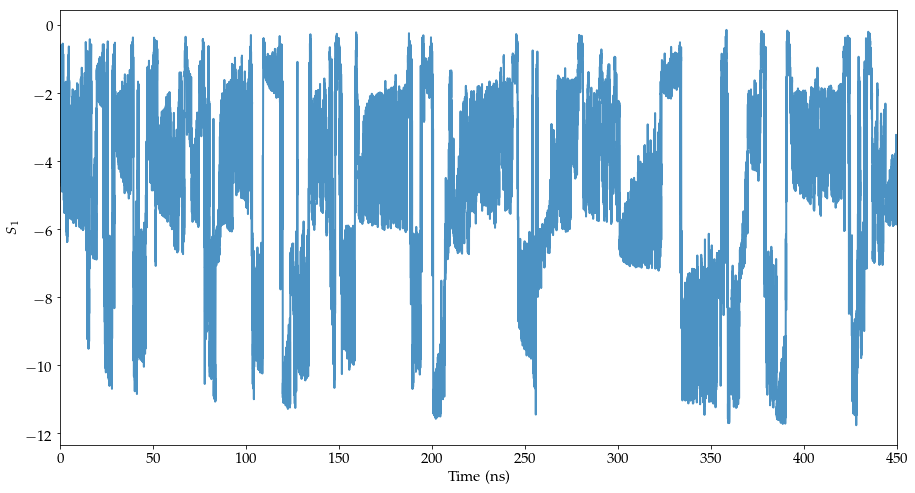

In [4]:
plt.rcParams['figure.figsize'] = (15, 8.)
fig, ax = plt.subplots()
ax.plot(colvar[::10,0]/1000.,colvar[::10,1],color=palette[0],linewidth=2.,alpha=0.8)
ax.set_xlabel(r'Time (ns)')
ax.set_ylabel(r'$S_1$')
#ax.legend()
#ax.set_ylim([0.,4000.])
ax.set_xlim([0,450])
plt.show()

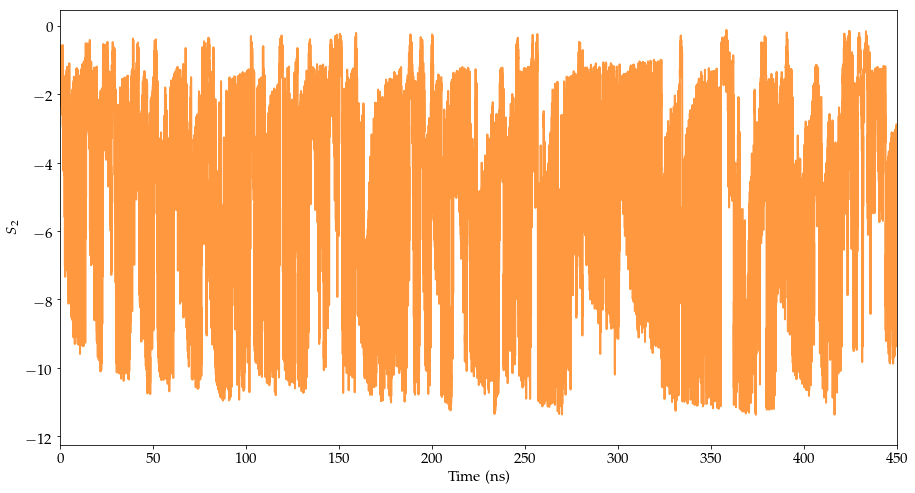

In [5]:
plt.rcParams['figure.figsize'] = (15, 8.)
fig, ax = plt.subplots()
ax.plot(colvar[::10,0]/1000.,colvar[::10,2],color=palette[2],linewidth=2.,alpha=0.8)
ax.set_xlabel(r'Time (ns)')
ax.set_ylabel(r'$S_2$')
#ax.legend()
#ax.set_ylim([0.,4000.])
ax.set_xlim([0,450])
plt.show()

### Load data and define functions to get one frame

In [6]:
nn=18
mm=11
lines=nn*mm
initialFrame=0
subsetFrames=45000
dataAngle1subset=np.genfromtxt("Bias/108molecule-system/450K-TwoCVs/Analysis/Gofr-450ns/Angle1/gofr.txt")
dataAngle2subset=np.genfromtxt("Bias/108molecule-system/450K-TwoCVs/Analysis/Gofr-450ns/Angle2/gofr.txt")
x=dataAngle1subset[0:lines,0].reshape(nn,mm)[:,0]
y=dataAngle1subset[0:lines,1].reshape(nn,mm)[0,:]
print(x,y)
dataAngle1subset=dataAngle1subset[initialFrame*lines:(initialFrame+subsetFrames)*lines,2]
dataAngle2subset=dataAngle2subset[initialFrame*lines:(initialFrame+subsetFrames)*lines,2]


def gofrAngle1FrameSubset(i):
        global dataAngle1subset, lines
        return dataAngle1subset[lines*i:lines*(i+1)]

def gofrAngle2FrameSubset(i):
        global dataAngle2subset, lines
        return dataAngle2subset[lines*i:lines*(i+1)]

[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85] [-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]


### Define distance

In [7]:
def distanceSubset(gofr,ref):
        epsilon=1.e-10
        integrand=np.zeros((nn,mm))
        for i in range(nn):
                for j in range(mm):
                        index=i*mm+j
                        if (gofr[index]<1.e-10):
                                integrand[i,j]=x[i]*x[i]
                        else:
                                integrand[i,j]=(gofr[index]*np.log(gofr[index]/(ref[index]+epsilon))-gofr[index] + (ref[index]+epsilon))*x[i]*x[i]
        return np.trapz(np.trapz(integrand))

def distanceSymmetricSubset(gofr,ref):
        epsilon=1.e-10
        integrand=np.zeros((nn,mm))
        for i in range(nn):
                for j in range(mm):
                        index=i*mm+j
                        if (gofr[index]<1.e-10 and ref[index]<1.e-10):
                                integrand[i,j]=0.
                        elif (gofr[index]<1.e-10 and ref[index]>1.e-10):
                                integrand[i,j]=(ref[index]*np.log(ref[index]/epsilon))*x[i]*x[i]/2.
                        elif (gofr[index]>1.e-10 and ref[index]<1.e-10):
                                integrand[i,j]=(gofr[index]*np.log(gofr[index]/epsilon))*x[i]*x[i]/2.
                        else:
                                integrand[i,j]=(gofr[index]*np.log(gofr[index]/ref[index])+ref[index]*np.log(ref[index]/gofr[index]))*x[i]*x[i]/2.
        return np.trapz(np.trapz(integrand))
    
def distanceSymmetricSubsetBoth(gofr,ref):
        epsilon=1.e-10
        integrand=np.zeros((nn,mm))
        result=0.
        for i in range(nn):
                for j in range(mm):
                        index=i*mm+j
                        if (gofr[index]<1.e-10 and ref[index]<1.e-10):
                                integrand[i,j]=0.
                        elif (gofr[index]<1.e-10 and ref[index]>1.e-10):
                                integrand[i,j]=(ref[index]*np.log(ref[index]/epsilon))*x[i]*x[i]/2.
                        elif (gofr[index]>1.e-10 and ref[index]<1.e-10):
                                integrand[i,j]=(gofr[index]*np.log(gofr[index]/epsilon))*x[i]*x[i]/2.
                        else:
                                integrand[i,j]=(gofr[index]*np.log(gofr[index]/ref[index])+ref[index]*np.log(ref[index]/gofr[index]))*x[i]*x[i]/2.
        result += np.trapz(np.trapz(integrand))
        integrand=np.zeros((nn,mm))
        for i in range(nn):
                for j in range(mm):
                        index=lines+i*mm+j
                        if (gofr[index]<1.e-10 and ref[index]<1.e-10):
                                integrand[i,j]=0.
                        elif (gofr[index]<1.e-10 and ref[index]>1.e-10):
                                integrand[i,j]=(ref[index]*np.log(ref[index]/epsilon))*x[i]*x[i]/2.
                        elif (gofr[index]>1.e-10 and ref[index]<1.e-10):
                                integrand[i,j]=(gofr[index]*np.log(gofr[index]/epsilon))*x[i]*x[i]/2.
                        else:
                                integrand[i,j]=(gofr[index]*np.log(gofr[index]/ref[index])+ref[index]*np.log(ref[index]/gofr[index]))*x[i]*x[i]/2.
        result += np.trapz(np.trapz(integrand)) 
        return result
        
step=1
distancePrevious1subset=np.zeros(subsetFrames)

for i in range(step,subsetFrames):
        distancePrevious1subset[i]=distanceSymmetricSubset(gofrAngle1FrameSubset(i),gofrAngle1FrameSubset(i-1)) + distanceSymmetricSubset(gofrAngle2FrameSubset(i),gofrAngle2FrameSubset(i-1))        


### Average contiguous frames that are similar

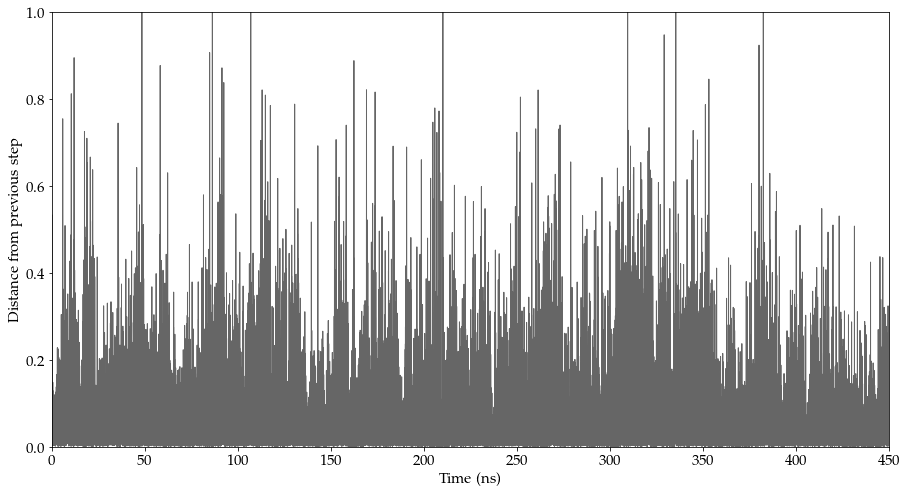

In [8]:
plt.rcParams['figure.figsize'] = (15, 8.)
fig, ax = plt.subplots()
normalization=20.
timePerFrame=0.01 # ns

ax.plot(np.arange(0,subsetFrames)*timePerFrame,distancePrevious1subset/normalization,color='black',linewidth=1.,alpha=0.6,label="CV1")

ax.set_xlabel(r'Time (ns)')
ax.set_ylabel(r'Distance from previous step')
ax.set_ylim([0.,1.])
ax.set_xlim([0,450])

plt.show()

6404


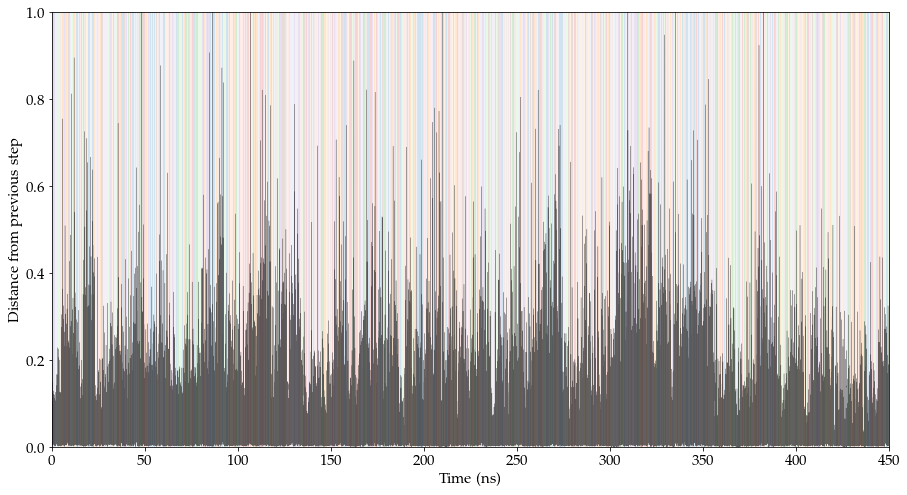

In [9]:
step=1
threshold=0.1*normalization
transitionSubset=np.zeros((subsetFrames,2))
regionsSubset=np.zeros((7000,3))
regionNumberSubset=0

for i in range(2,subsetFrames):
        transitionSubset[i,0]=i
        if (distancePrevious1subset[i]>threshold and np.sum(transitionSubset[i-2:i-1,1])==0. ):
                transitionSubset[i,1]=1.
                regionsSubset[regionNumberSubset,0]=regionNumberSubset
                regionsSubset[regionNumberSubset,2]=i
                regionsSubset[regionNumberSubset+1,1]=i
                regionNumberSubset += 1
                
print(regionNumberSubset)

plt.rcParams['figure.figsize'] = (15, 8.)
fig, ax = plt.subplots()

for i in range(regionNumberSubset):
        ax.fill_between([regionsSubset[i,1]*timePerFrame,regionsSubset[i,2]*timePerFrame],0.,1.,color=palette[ np.remainder(i,12)],linewidth=0.0,alpha=0.2)

ax.plot(np.arange(0,subsetFrames)*timePerFrame,distancePrevious1subset/normalization,color='black',linewidth=0.3,alpha=0.6,label="CV1")
#ax.plot(transitionSubset[:,0]*timePerFrame,transitionSubset[:,1],color=palette[4],linewidth=2.,alpha=0.6,label="CV2")
#ax.plot(regions[:,0]*1.,regions[:,1]/16,color=palette[2],linewidth=2.,alpha=0.6,label="CV3")


ax.set_xlabel(r'Time (ns)')
ax.set_ylabel(r'Distance from previous step')
ax.set_ylim([0.,1.])
ax.set_xlim([0,450])

plt.show()

In [10]:
def averageGofrAngle1FromToSubset(imin,imax):
        avgGofr=np.zeros(nn*mm)
        for i in range(int(imin),int(imax)):
                avgGofr += gofrAngle1FrameSubset(i)
        avgGofr /= imax-imin
        return avgGofr

def averageGofrAngle2FromToSubset(imin,imax):
        avgGofr=np.zeros(nn*mm)
        for i in range(int(imin),int(imax)):
                avgGofr += gofrAngle2FrameSubset(i)
        avgGofr /= imax-imin
        return avgGofr

In [11]:
# Average of vectors
arrays = [np.concatenate( (averageGofrAngle1FromToSubset(regionsSubset[i,1],regionsSubset[i,2]),
                           (averageGofrAngle2FromToSubset(regionsSubset[i,1],regionsSubset[i,2])) ) ) for i in range(regionNumberSubset)]
data=np.stack(arrays, axis=0)
data.shape

(6404, 396)

### Do the clustering

In [12]:
import fastcluster

Zsubset = fastcluster.linkage(data, 'average', metric=distanceSymmetricSubsetBoth)

In [102]:
np.save('clustering-20-108mol-450ns.npy',Zsubset)

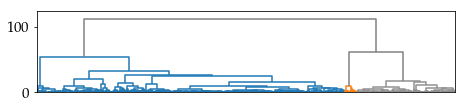

In [13]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

plt.rcParams['figure.figsize'] = (7.5, 1.5)
fig, ax = plt.subplots()

hierarchy.set_link_color_palette(paletteNewNames)
    
dnSubset = dendrogram(Zsubset,color_threshold=60,above_threshold_color='grey')

ax.set_ylim([0,125])

ax.tick_params(labelbottom='off')    

#plt.savefig('tree-diagram-1.png', bbox_inches='tight', dpi=300)

plt.show()

In [106]:
clustersSubset = fcluster(Zsubset, 15, criterion='distance')

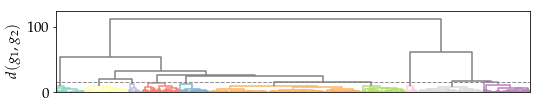

In [105]:
plt.rcParams['figure.figsize'] = (8.5, 1.5)
#plt.rcParams['figure.figsize'] = (5., 1.5)
fig, ax = plt.subplots()

hierarchy.set_link_color_palette(paletteCBQNames)
    
dnSubset = dendrogram(Zsubset,color_threshold=15,above_threshold_color='grey')

ax.tick_params(labelbottom='off')    

ax.set_ylim([0,125])
#ax.set_ylim([0,60])
#ax.set_xlim([0,21625])

ax.plot([0,70000],[15,15],'--',color='gray',linewidth=1.,alpha=0.9)

ax.set_ylabel(r'$d(g_1,g_2)$')

#plt.savefig('tree-diagram-2.png', bbox_inches='tight', dpi=300)

plt.show()